In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import CPTAC

Loading Clinical Data...
Loading Proteomics Data...
Loading Transcriptomics Data...
Loading CNA Data...
Loading Phosphoproteomics Data...
Loading Somatic Data...

 ******PLEASE READ******


In [9]:
somatic_mutations = CPTAC.get_somatic()
proteomics = CPTAC.get_proteomics()
phos = CPTAC.get_phosphoproteomics()
phos.head()

idx,AAAS-S495,AAK1-S18,AAK1-S20,AAK1-S21,AAK1-S624,AAK1-S637,AAK1-S670,AAK1-S678,AAK1-S682,AAK1-S731,...,ZZEF1-S1464,ZZEF1-S1488,ZZEF1-S1501,ZZEF1-S1518,ZZEF1-S2444,ZZEF1-T1477,ZZEF1-T1512,ZZEF1-T1521,ZZZ3-S397,ZZZ3-S426
S001,NaN,-0.28,0.44,0.52,-0.70,-0.68,-0.49,-0.43,-0.93,NaN,...,-0.28,-0.20,-0.11,-0.11,-0.08,-0.27,NaN,0.24,0.42,-0.26
S002,NaN,-0.53,-1.14,0.10,-0.66,-0.42,-0.43,-0.29,-0.39,-0.25,...,0.44,0.37,0.60,0.33,NaN,1.13,1.00,0.34,-0.19,-0.55
S003,-0.29,0.42,-0.05,-0.06,-0.03,0.80,NaN,-1.41,0.16,-0.09,...,1.05,0.61,NaN,0.36,0.53,0.52,0.28,-0.27,NaN,NaN
S004,0.15,NaN,-0.54,-0.17,0.21,-0.17,0.58,0.50,NaN,-0.52,...,0.03,-0.18,NaN,0.68,0.28,NaN,0.85,-0.32,0.03,-0.75
S005,0.60,0.64,-0.05,-0.08,0.14,0.63,0.52,-0.76,-0.30,-0.01,...,-0.54,0.48,-0.70,0.26,-0.59,-0.66,-0.13,-0.21,-0.10,0.15


In [5]:
high = somatic_mutations.sum() == max(somatic_mutations.sum())
gene = "ERBB4"
print(gene)

ERBB4


In [6]:
cross = CPTAC.compare_gene(somatic_mutations, proteomics, gene)

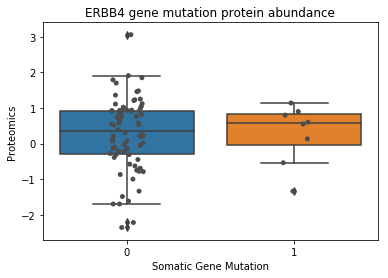

In [8]:
somatic_boxplot = sns.boxplot(data=cross, x="somatic",y="proteomics")
somatic_boxplot.set_title("ERBB4 gene mutation protein abundance")
somatic_boxplot = sns.stripplot(data=cross, x="somatic", y="proteomics",jitter=True, color=".3")
somatic_boxplot.set(xlabel="Somatic Gene Mutation",ylabel="Proteomics")
plt.savefig("uc4PTEN.pdf",dpi = 300)

In [ ]:
pcutoff = 0.05 / len(proteomics.columns)
pcutoff